# **TP05:ANN Réseaux de Neurones Artificiels**

**Les Réseaux de neurones artificiels** est un système d'aprentissage dont la conception est à l'origine schématiquement inspirée du fonctionnement des neurones biologiques, et qui par la suite s'est rapproché des méthodes statistiques. 

## **Partie I**: Réseaux de neurones avec sklearn 

# **I-Perceptron Linéaire avec la méthode de descente du gradiant**

L'Objectif de cette exercice est de classifier de nouvelles plantes en se basant sur un ensemble de données des plantes toxiques (Y=1) et non toxiques (Y=0).

La classification selon deux variables:

 $x_1$: la largeur de la plante 

 $x_2$: la longueur de la plante.


**Q1-**Utilisez la fonction make_blobs(n_samples,centers, cluster_std,random_state) du module sklearn.datasets pour generer deux classes puis visualiser ces classes
*   rouge: y=0 (non toxique)
*   blue: y=1 (toxique)


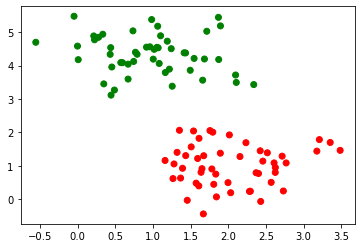

In [40]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

x,y=make_blobs(n_samples=100,centers=2,cluster_std=0.6,random_state=0)
# y=np.reshape(y,(len(y),1))
colors=[]
for i in y:
    if i==0:   # non toxic
      colors.append("green")
    else: # toxic
      colors.append("red")
plt.scatter(x[:,0],x[:,1],c=colors)

**Q2** 

a) Afficher la matrice X, corriger les dimension de Y. 

b) Créer un fonction pour initialiser aléatoirement les poids W et le biais b.

c) Ecrire le modèle $Z=X.W+b ; \quad A=\frac{1}{1+\exp(-Z)}$
 
d) Ecrire la ***Fonction du coût***:$J=-\frac{1}{m}\sum y\log(A)+(1-y) \log(1-A)$
 
e) Ecrire un script qui définit la fonction du gradiant $$ \frac{\delta J}{\delta W}=\frac{1}{m}X^T.(A-y);  \quad \frac{\delta J}{\delta b}=\frac{1}{m} \sum (A-y) $$
 
f) Implementer la descente de gradient en utilisant de gradiant:
$$ W\leftarrow W- \alpha\frac{\delta J}{\delta W}$$
$$ b\leftarrow b- \alpha\frac{\delta J}{\delta b}$$
 
g) Trouver les meilleurs valeurs de $W$ et $b$ pour un learning rate $\alpha=0.1$ et un nombre d'itérations de $100$

h) Utiliser  disponible comme méthode dans le module sklearn.metrics pour calculer le score du modèle



In [49]:
#a
y=np.reshape(y,(len(y),1))

In [41]:
#b
def aleatoire():
    return np.random.randn(x.shape[1],1),np.random.randn(1,1)
w,b=aleatoire()
print(w,b)

[[-1.13788061]
 [ 0.76587586]] [[-0.84241173]]


In [42]:
#c
def definition_function(x,w,b):
    return np.dot(x,w)+b

def activation_function(t):
    return 1/(1+np.exp(-t))


In [43]:
#d
def cost_function(y,a):
    return float( (-1/len(y))*sum(np.dot(y,np.log(a)),(1-y).dot(np.log(1-a))) )

a=activation_function(definition_function(x,w,b) )
cost_function(y,a)

2.0868932473978656

In [44]:
#e
def gradient_function(x,a,y):
    return ((1/len(x))*(np.dot(np.transpose(x),(a-y)))) , (1/len(x))*sum((1-y))


In [45]:
#f
def implementation(iteration,alpha,x,a,y,w,b):
    new_w,new_b=w,b
    for _ in range(iteration):
        new_w=new_w-alpha*gradient_function(x,a,y)[0]
        new_b=new_b-alpha*gradient_function(x,a,y)[1]
    return new_w,new_b

In [46]:
#g
w1,b1=implementation(100,0.1,x,a,y,w,b)

In [50]:
#h
from sklearn.metrics import *
def predict(x,w,b):
    return activation_function(definition_function(x,w,b) )>0.5
accuracy_score(y,predict(x,w,b))

0.04

**Q3-Tracer la Frontiere de décision**

<Figure size 864x432 with 0 Axes>

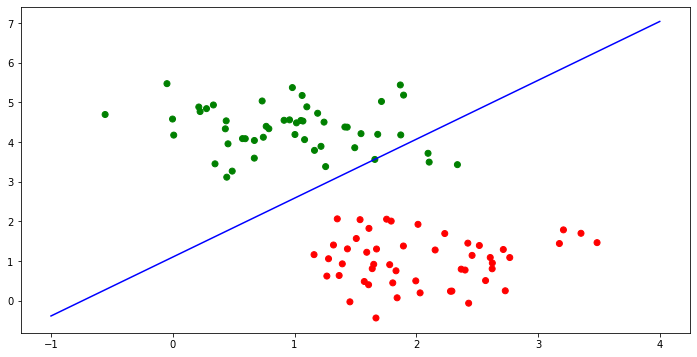

In [48]:
plt.figure(figsize=(12,6))
fig,ax=plt.subplots(figsize=(12,6))
ax.scatter(x[:,0],x[:,1],c=colors)
new_x=np.linspace(-1,4,100)
new_x2=(-w[0]*new_x -b)/w[1]
ax.plot(new_x,new_x2[0],c="blue")

### Q3. Prédiction

A quelle classe apartient les deux plantes suivantes: (2,1); (0,5) 

In [13]:
def predict_value(x,w,b):
    pred=definition_function(x,w,b)
    if pred>0.5 :
        return 1
    else:
        return 0
  
print("x1: {}\nx2: {}".format(predict_value(np.array([2,1]),w,b),predict_value(np.array([0,5]),w,b)))
# accuracy_score(y,predict_value(x,w,b))

x1: 1
x2: 0


# II-**Perceptron Multicouche**


Q1
1- Construire un Dataframe ***data*** contenant les données stoker dans le fichier ***diabetes.csv*** 

2- Visualiser ce dataframe ainsi que les différentes mesure sur ce dataframe

In [14]:
#1
import pandas as pd
data=pd.read_csv("diabetes.csv")
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [15]:
#2
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Q2. Selection des caractéristiques
Créer les deux dataframes:
- X: le dataframe des entrée (['Age', 'BloodPressure','Glucose', 'Insulin', 'BMI']) 
- y: la sortie (outcome)

In [30]:
X=np.array(data[["Age","BloodPressure","Glucose","Insulin","BMI"]])
Y=np.array(data["Outcome"])

#### Q3. Partitionner ces données en X_train, X_test, y_train, y_test

In [31]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.1)

#### Q4. Création, entrainement et évaluation du modèle
1. Utiliser le classifieur ***MLPClassifier*** du module ***sklearn.neural_network*** pour initialiser et entrainer trois perceptrons:
- avec une seule couche cachée de 8 neurones
- avec deux couches cachées de (8,16) neurones
- avec trois couches cachées.

2. Afficher la matrice de confusion de ce modèle

In [ ]:
#1
from sklearn.neural_network import MLPClassifier

couche={"un_seul_couche":(8),"deux_couche":(8,16),"trois_couche":(8,8,8)}
for cle in couche:
    model=MLPClassifier(random_state=1,hidden_layer_sizes=couche[cle],activation="logistic",solver="lbfgs",max_iter=3000).fit(x_train,y_train)
    print("confusion matrix for {}\n{}".format(cle,confusion_matrix(Y,model.predict(X))) )

confusion matrix for un_seul_couche
[[391 109]
 [155 113]]
confusion matrix for deux_couche
[[407  93]
 [131 137]]
confusion matrix for trois_couche
[[451  49]
 [189  79]]


C:\Users\DELL XPS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Q5. utilisation du modèle

Mr Rachid a fait un bilon et a obtenu les resu Après un bilon Mr

    Age: 22
    Glucose: 79
    BloodPressure: 69
    Insulin: 31
    BMI: 0.4

Mr Rachid a-t-il un diabéte?

In [ ]:
int(model.predict(np.array([[32,79,69,31,0.4]])))

0

## **Partie II**: Réseaux de neurones avec tensorflow et kearas
-Reconnaissance de chiffres(handwritten digit recognition)

Le module Python tensorflow est très puissant pour l’apprentissage automatique. Le module keras a
été élaboré pour pouvoir utiliser tensorflow plus simplement.
Nous profitons de la librairie tensorflow/keras qui en
quelques lignes nous permet d’importer des données, de construire un réseau de neurones à plusieurs
couches, d’effectuer une descente de gradient et de valider les résultats. 

Objectif de cette exercice est de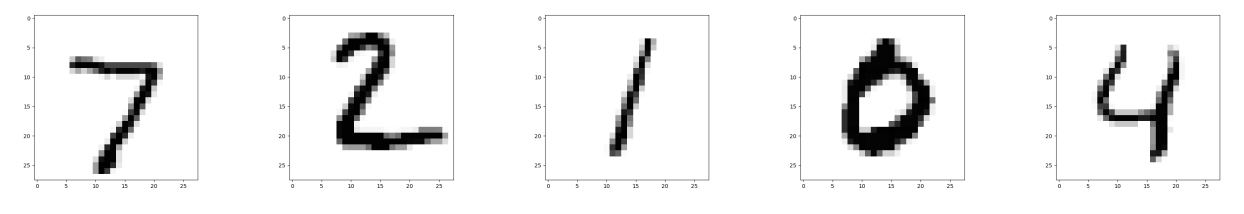reconnaître de façon automatique des chiffres écrits à la main.

### 1-**Dataset**

Q1- Utiliser la base "mnist" de tensorflow.keras.datasets pour importer les données.

 Plus en détails :

• La base mnist est formée de 60 000 données d’apprentissage et de 10 000 données de test.
• Chaque donnée est de la forme : [une image, le chiffre attendu].

• Chaque image est de taille 28×28 pixels, chaque pixel contenant un des 256 niveaux de gris (numérotés
de 0 à 255).

Ces données sont accessibles très simplement avec tensorflow/keras :

In [32]:
from tensorflow.keras.datasets import mnist

d=mnist.load_data()

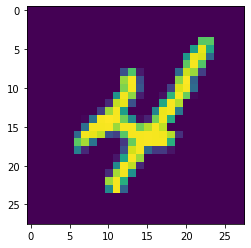

In [33]:
# x,y=d[0],d[1]
arr=d[0][0][9]
plt.imshow(arr)

In [48]:
x,y=d[0]#np.array(d[0][0]),np.array(d[1][1])

**Donnée d’entrée.**

 En entrée du réseau de neurones, nous devons avoir un vecteur. Au départ chaque image
est un tableau de taille 28 × 28 ayant des entrées entre 0 et 255. Nous la transformons en un vecteur de
taille $784 = 28^2$

et nous normalisons les données dans l’intervalle [0, 1] (en divisant par 255).

Ainsi, une entrée X est un « vecteur-image », c’est-à-dire un vecteur de taille 784 représentant une image.

**Donnée de sortie.**

Notre réseau de neurones ne va pas renvoyer le chiffre attendu, mais une liste de 10
probabilités. Ainsi chaque chiffre doit être codé par une liste de 0 et de 1.
• 0 est codé par (1, 0, 0, 0, 0, 0, 0, 0, 0, 0),

• 1 est codé par (0, 1, 0, 0, 0, 0, 0, 0, 0, 0),

• 2 est codé par (0, 0, 1, 0, 0, 0, 0, 0, 0, 0),

• . . .

• 9 est codé par (0, 0, 0, 0, 0, 0, 0, 0, 0, 1).

**Fonction.**
Nous cherchons une fonction $F : R^{784} → R^{10}$, qui à un vecteur-image associe une liste de probabilités, telle que F(Xi) ' Yi pour nos données transformées (Xi, Yi), i = 1, . . . , 60 000.

Par exemple la fonction F, évaluée sur un vecteur-image X peut renvoyer
F(X) = (0.01, 0.04, 0.03, 0.01, 0.02, 0.22, 0.61, 0.02, 0.01, 0.01, 0.02).

Dans ce cas, le nombre le plus élevé est 0.61 au rang 6, cela signifie que notre fonction F prédit le chiffre 6 avec une probabilité de 61%, mais cela pourrait aussi être le chiffre 5 qui est prédit à 22%. Les autres chiffres sont peu probables.


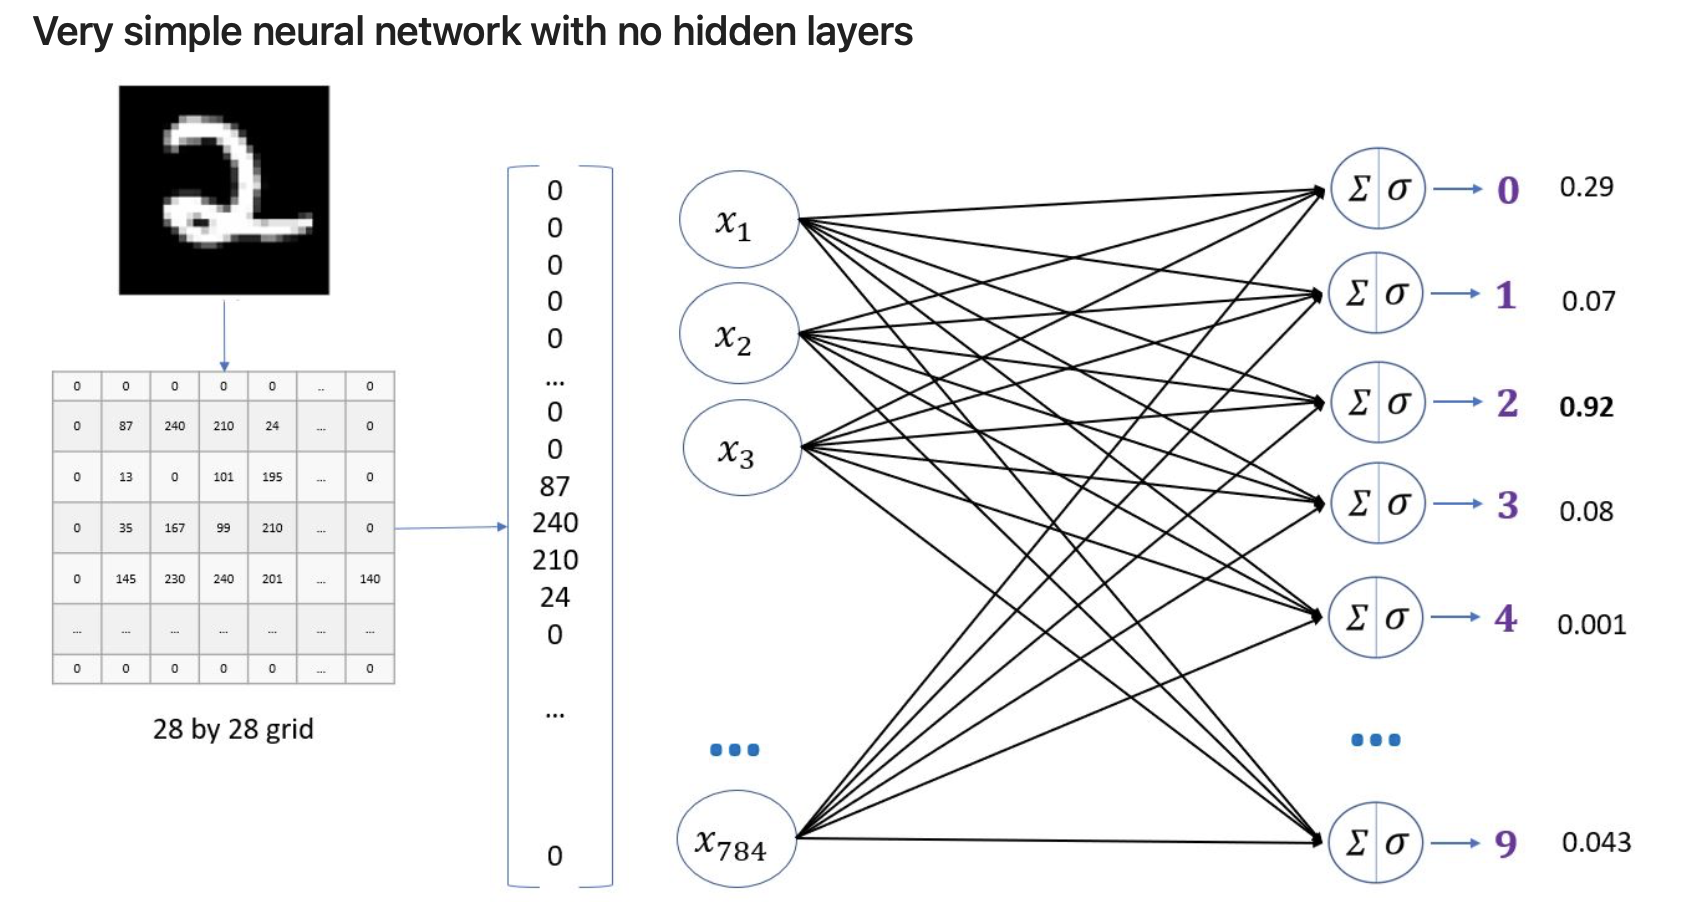

**Q_2** Redimensioner X et normaliser les données

In [49]:
x = x.reshape(60000,784)
x.shape

(60000, 784)

In [50]:
# normalistaion des données
normalistaion_x = x/255

**Q_3** Catégoriser les Données d'apprentissage Y vers une liste de taille 10

In [52]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split as tts
# print(x.shape,y.shape)
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1)
# (x_train,y_train),(x_test,y_test) = d
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test, 10)


**Q3** Construisez un réseau de neurones qui produira une fonction F : R^{784} → R^{10}$ L’architecture est
composée de 3 couches. 

En entrée nous avons un vecteur de taille 784. La première et la seconde couches
sont composées chacune de p = 8 neurones ( Fonction d'activation sigmoid). La couche de sortie (est formée de 10 neurones, un pour chacun
des chiffres.

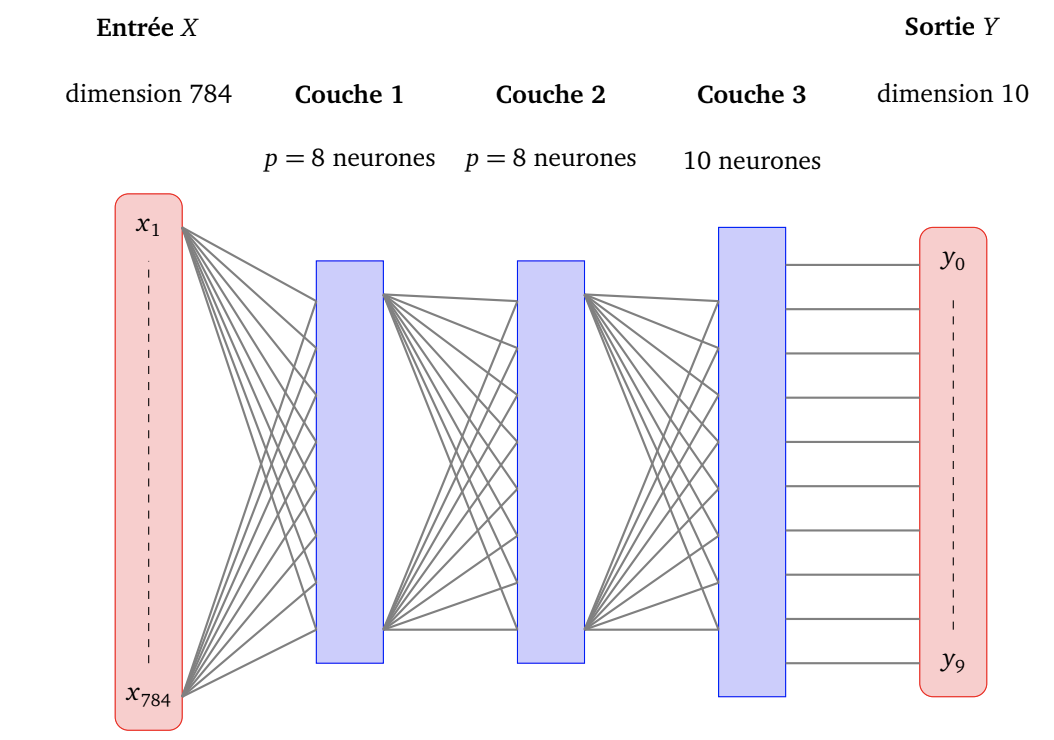

In [53]:
# librairies that we will use
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations

my_module = Sequential([
        Dense(8, input_shape=(784,),activation=activations.sigmoid),
        Dense(8,activation=activations.sigmoid),
        Dense(10,activation=activations.sigmoid),
        Dense(10,activation = "softmax")])

my_module.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=["accuracy"])
print(my_module.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 6280      
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 10)                90        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 6,552
Trainable params: 6,552
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
my_module.fit(x_train,y_train,batch_size=32, epochs=40)

Epoch 1/40
1688/1688 [==============================] - 9s 4ms/step - loss: 2.2964 - accuracy: 0.1195
Epoch 2/40
1688/1688 [==============================] - 7s 4ms/step - loss: 2.2537 - accuracy: 0.1864
Epoch 3/40
1688/1688 [==============================] - 7s 4ms/step - loss: 2.1634 - accuracy: 0.3037
Epoch 4/40
1688/1688 [==============================] - 7s 4ms/step - loss: 1.9918 - accuracy: 0.3527
Epoch 5/40
1688/1688 [==============================] - 7s 4ms/step - loss: 1.8378 - accuracy: 0.4052
Epoch 6/40
1688/1688 [==============================] - 7s 4ms/step - loss: 1.7312 - accuracy: 0.4058
Epoch 7/40
1688/1688 [==============================] - 7s 4ms/step - loss: 1.6272 - accuracy: 0.4186
Epoch 8/40
1688/1688 [==============================] - 7s 4ms/step - loss: 1.5338 - accuracy: 0.4499
Epoch 9/40
1688/1688 [==============================] - 7s 4ms/step - loss: 1.4594 - accuracy: 0.4548
Epoch 10/40
1688/1688 [==============================] - 7s 4ms/step - loss: 1.406

**Q4-Entrainer et Evaluer le modèle  **

In [56]:
print("loss result",my_module.evaluate(x_test,y_test)[0],"\naccurency",my_module.evaluate(x_test,y_test)[1])

188/188 [==============================] - 1s 4ms/step - loss: 0.8526 - accuracy: 0.7298
loss result 0.8526221513748169 
accurency 0.7298333048820496


Q5-Prédiction 
Pour une donnée particulière, comparez le chiffre prédit et le chiffre attendu.

valeur predit 6 
valeur attendu


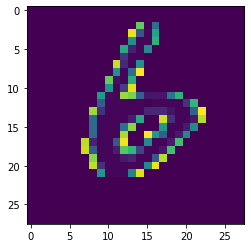

In [64]:
y_predict=my_module.predict(x_test)
print("valeur predit",np.argmax(y_predict[500]),"\nvaleur attendu")

value=(x_test[500]*255).reshape(28,28).astype("uint8") # for return our matrix to initiale size
plt.imshow(value)
